In [106]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

In [38]:
def crop_upper_part(image, percent=0.4):
    height, _ = image.shape
    point = int(percent * height)
    return image[0:point,:]

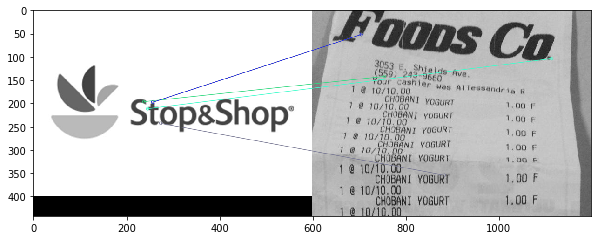

In [122]:
img1 = cv2.imread('/home/bartol/Documents/Logos/stop_and_shop.jpg',0)          # queryImage
img2 = cv2.imread('/home/bartol/Projects/mozgalo-mb/src/data/test_annotated/Other/51.jpg',0) # trainImage
# Initiate SIFT detector
img2 = crop_upper_part(img2, 0.4)
sift = cv2.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)
plt.imshow(img3)
plt.show()